<a href="https://colab.research.google.com/github/leo96code/Neural-Style-Transfer/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing Neural Style Transfer

##Set Google Colab runtime

In [19]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!git clone https://github.com/parth1620/Project-NST.git

fatal: destination path 'Project-NST' already exists and is not an empty directory.


##Loading VGG Pretrained Model

In [21]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained = True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [22]:
#we only need features part as we just need feature extraction.
vgg_f = vgg.features
print(vgg_f)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [23]:
#freezing the grad calculation as we'll be using pretrained model
for parameters in vgg_f.parameters():
  parameters.requires_grad_(False)

In [24]:
#move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [25]:
vgg_f.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

##Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [26]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size = 500):
  image = Image.open(img_path).convert('RGB')
  print(image.size)
  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  img_transform = T.Compose([
                             
                  T.Resize(size),
                  T.ToTensor(), #(h,w,c) -> (c, h, w)
                  T.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
  ])

  image = img_transform(image)
  
  #unsqueezing for adding the batch size = 1 to meet the format
  # (channel, h, w) -> (batch_size = 1, c, h, w)
  image = image.unsqueeze(0)
  return image

In [27]:
#preprocessing content and style images
content_img_pre = preprocess('/content/cityblusky.jpg')
style_img_pre = preprocess('/content/StarryNights.jpg')

content_img_pre = content_img_pre.to(device)
style_img_pre = style_img_pre.to(device)

print('Content Shape', content_img_pre.shape)
print('Style Shape', style_img_pre.shape)

(800, 600)
(4096, 3279)
Content Shape torch.Size([1, 3, 500, 666])
Style Shape torch.Size([1, 3, 500, 624])


##Deprocess image

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#reversing the preprocessing
def deprocess(tensor):
  image = tensor.to('cpu').clone() #moving a copy of preprocessed tensor to cpu
  image = image.numpy()
  image = image.squeeze(0) #(1, c, h, w) -> (c, h, w)
  image = image.transpose(1,2,0) #(c,h,w) -> (h, w, c) reverse Tensor conversion effect
  image = image*np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
  image = image.clip(0,1)

  return image

In [29]:
content_img_d = deprocess(content_img_pre)
style_img_d = deprocess(style_img_pre)

In [30]:
print(content_img_d.shape)
print(style_img_d.shape)

(500, 666, 3)
(500, 624, 3)


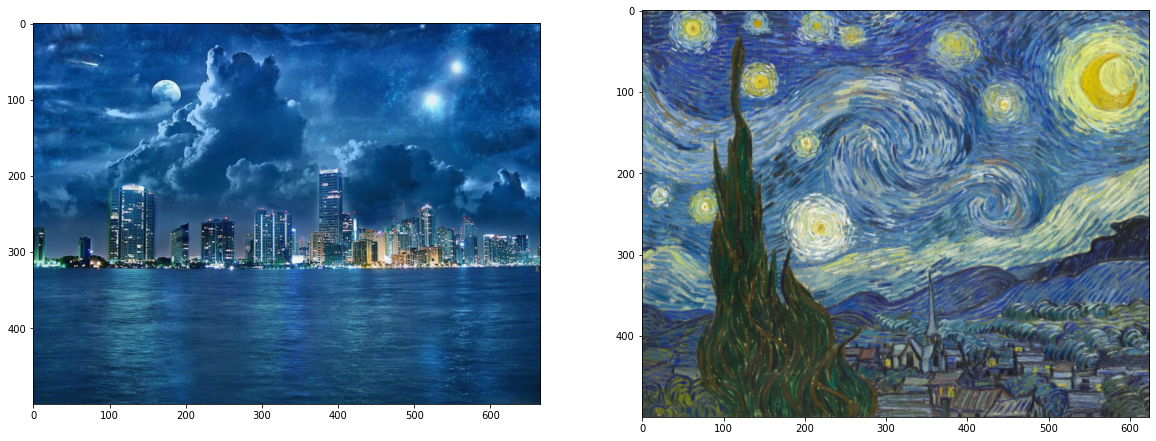

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.imshow(content_img_d)
ax2.imshow(style_img_d)

##Get content,style features and create gram matrix

In [32]:
def get_features(image, model):

  layers = {
      
      '0' : 'conv1_1',
      '5' : 'conv2_1',
      '10' : 'conv3_1',
      '19' : 'conv4_1',
      '21' : 'conv4_2', #content_feature ---experiment by using different layers
      '28' : 'conv5_1',
  }

  x = image
  features = {}
  
  for name,layer in model._modules.items():

    x = layer(x)

    if name in layers:
      features[layers[name]] = x

  return features


In [33]:
content_f = get_features(content_img_pre, vgg_f)
style_f = get_features(style_img_pre, vgg_f)

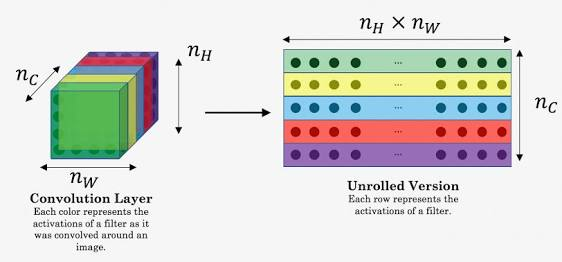

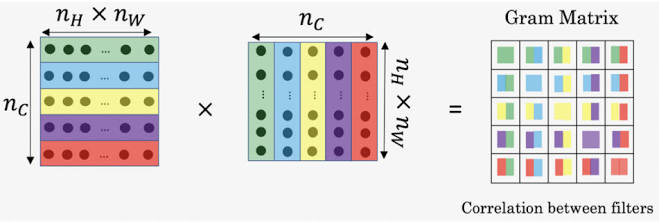

In [34]:
def gram_matrix(tensor):
  b,c,h,w = tensor.size()
  tensor = tensor.view(c, h*w) #tensor.view returns a tensor with same data as self with new shape
  gram = torch.mm(tensor, tensor.t())
  
  return gram

In [35]:
style_grams = {layer : gram_matrix(style_f[layer]) for layer in style_f}

In [36]:
#style_grams

##Creating Style and Content loss function

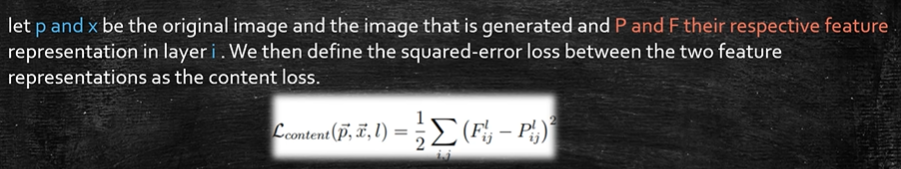

In [37]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)

  return loss

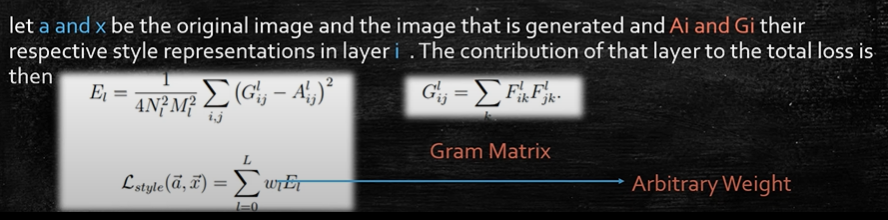

In [38]:
style_weights = {
    'conv1_1' : 1.0,
    'conv2_1' : 0.75,
    'conv3_1' : 0.2,
    'conv4_1' : 0.2,
    'conv5_1' : 0.2
}

In [39]:
def style_loss(style_weights, target_features, style_gram):
  loss = 0

  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b,c,h,w = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    loss += layer_loss/(c*h*w)

  return loss

### Initialize the target image with content image, you can also initialize it with random noise.

In [40]:
target = content_img_pre.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg_f)
print("Content Loss : ", content_loss(target_f['conv4_2'], content_f['conv4_2']))
print("Content Loss : ", style_loss(style_weights, target_f, style_grams))

Content Loss :  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Content Loss :  tensor(681.1187, device='cuda:0', grad_fn=<AddBackward0>)


## Training loop

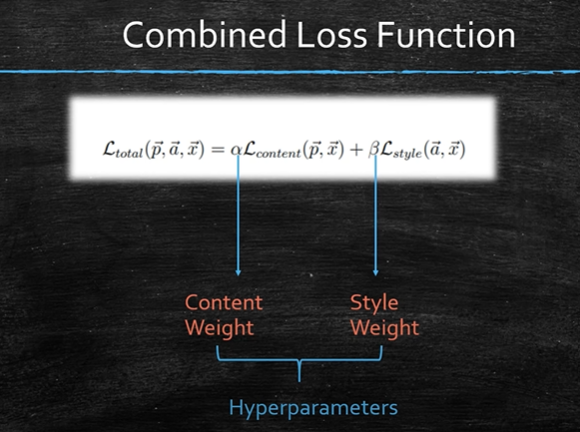

In [41]:
from torch import optim

optimizer = optim.Adam([target], lr = 0.003)

alpha = 1
beta = 1e5

epochs = 5000
show_progress = 500

In [42]:
def total_loss(c_loss, s_loss, alpha, beta):

  loss = alpha*c_loss + beta*s_loss
  return loss

In [43]:
results = []

for i in range(epochs):
  target_f = get_features(target, vgg_f)

  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_progress == 0:
    print("Epoch {} : Total Loss = {}".format(i, t_loss))
    results.append(deprocess(target.detach()))

Epoch 0 : Total Loss = 68111872.0
Epoch 500 : Total Loss = 524360.5
Epoch 1000 : Total Loss = 232543.96875
Epoch 1500 : Total Loss = 140204.859375
Epoch 2000 : Total Loss = 88699.6015625
Epoch 2500 : Total Loss = 58916.25
Epoch 3000 : Total Loss = 41347.515625
Epoch 3500 : Total Loss = 30533.830078125
Epoch 4000 : Total Loss = 23490.68359375
Epoch 4500 : Total Loss = 18560.005859375


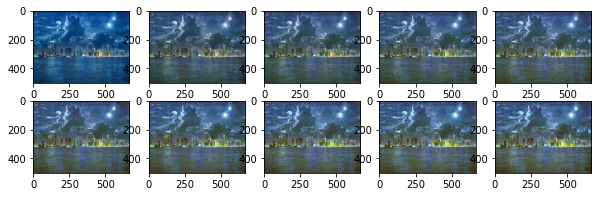

In [44]:
plt.figure(figsize= (10,8))

for i in range(len(results)):
  plt.subplot(5,5, i+1)
  plt.imshow(results[i])

plt.show()

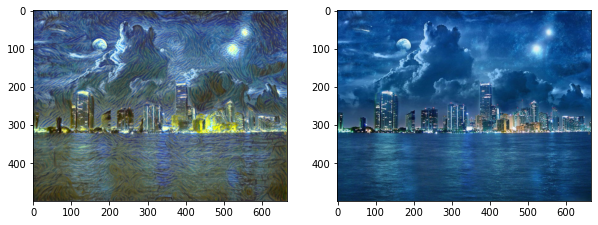

In [45]:
target_copy = deprocess(target.detach())

fig, (ax1, x2) = plt.subplots(1,2, figsize = (10,10))

ax1.imshow(target_copy)
ax2.imshow(content_img_d)

plt.imshow(content_img_d)